In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load the Excel file into a DataFrame
#file_path ='‪C:\Users\1234\Downloads\UberDataset.csv' # Replace with the actual path to your Excel file
uber_data = pd.read_csv(r'C:\Users\1234\Downloads\UberDataset.csv')

In [11]:
# Display the first few rows of the DataFrame
print("First Few Rows of Uber Data:")
print(uber_data.head())

First Few Rows of Uber Data:
         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  


In [12]:
# Basic statistics of the numerical columns
print("\nBasic Statistics:")
print(uber_data.describe())


Basic Statistics:
              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


In [13]:
# Count the occurrences of each unique value in the 'CATEGORY' column
category_counts = uber_data['CATEGORY'].value_counts()
print("\nCategory Counts:")
print(category_counts)


Category Counts:
Business    1078
Personal      77
Name: CATEGORY, dtype: int64


In [14]:
# Calculate the total miles and average miles per trip
total_miles = uber_data['MILES'].sum()
average_miles_per_trip = uber_data['MILES'].mean()
print("\nTotal Miles:", total_miles)
print("Average Miles per Trip:", average_miles_per_trip)


Total Miles: 24409.4
Average Miles per Trip: 21.11539792387542


In [15]:
# Analyze the 'PURPOSE' column
purpose_counts = uber_data['PURPOSE'].value_counts()
print("\nPurpose Counts:")
print(purpose_counts)


Purpose Counts:
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


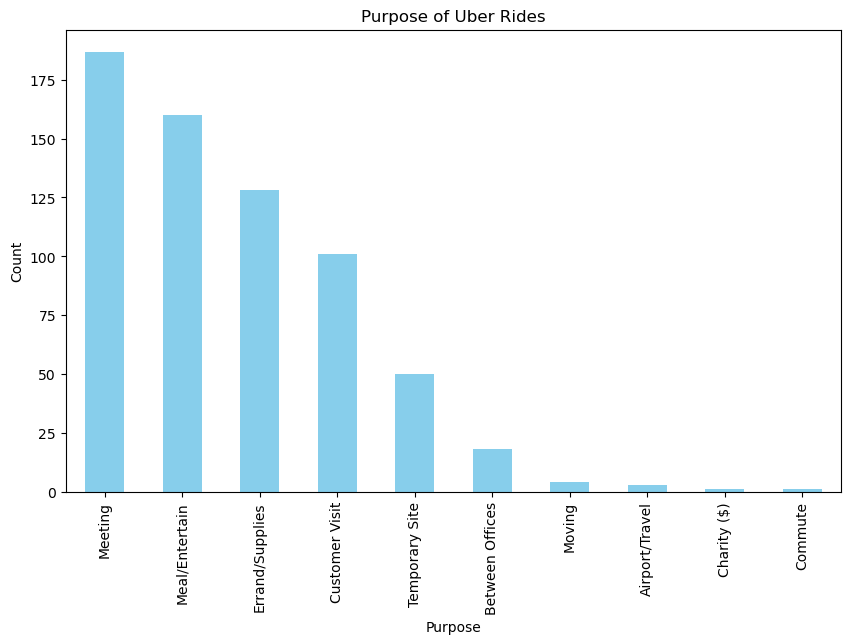

In [16]:
# Visualize the purpose counts
plt.figure(figsize=(10, 6))
purpose_counts.plot(kind='bar', color='skyblue')
plt.title('Purpose of Uber Rides')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

In [27]:
# Convert 'START_DATE' to datetime format with error handling
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')


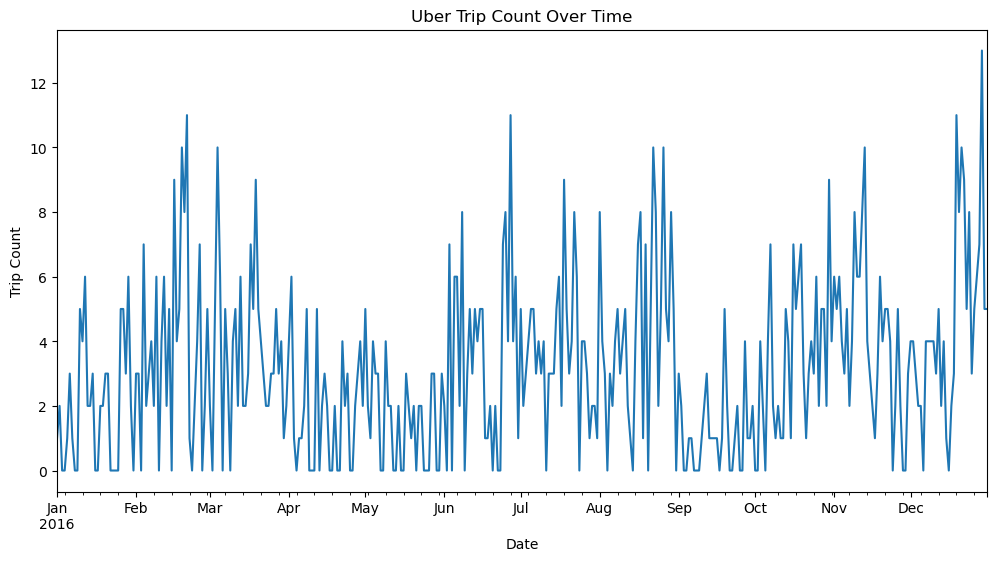

In [28]:
# Create a line plot of trip counts over time
plt.figure(figsize=(12, 6))
uber_data.resample('D', on='START_DATE').size().plot()
plt.title('Uber Trip Count Over Time')
plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.show()

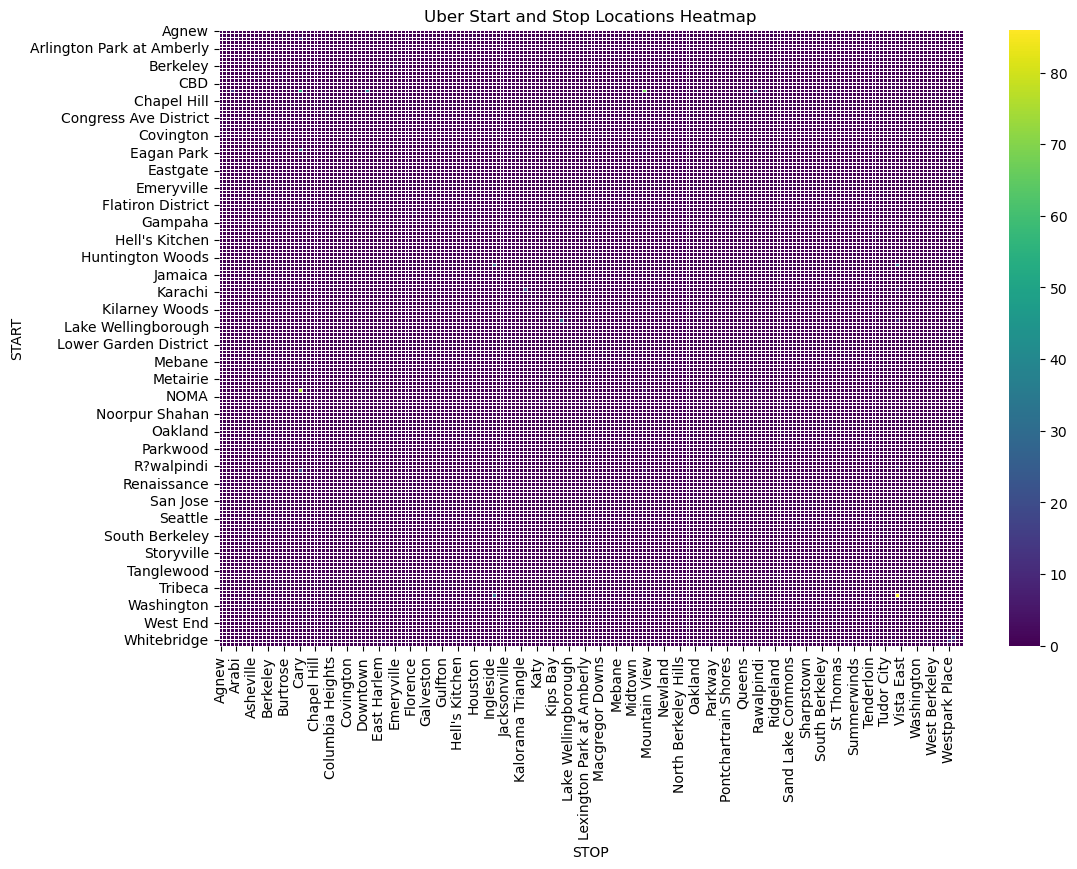

In [29]:
import seaborn as sns

# Create a heatmap of start and stop locations
plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(uber_data['START'], uber_data['STOP'])
sns.heatmap(heatmap_data, cmap='viridis', linewidths=.5)
plt.title('Uber Start and Stop Locations Heatmap')
plt.show()


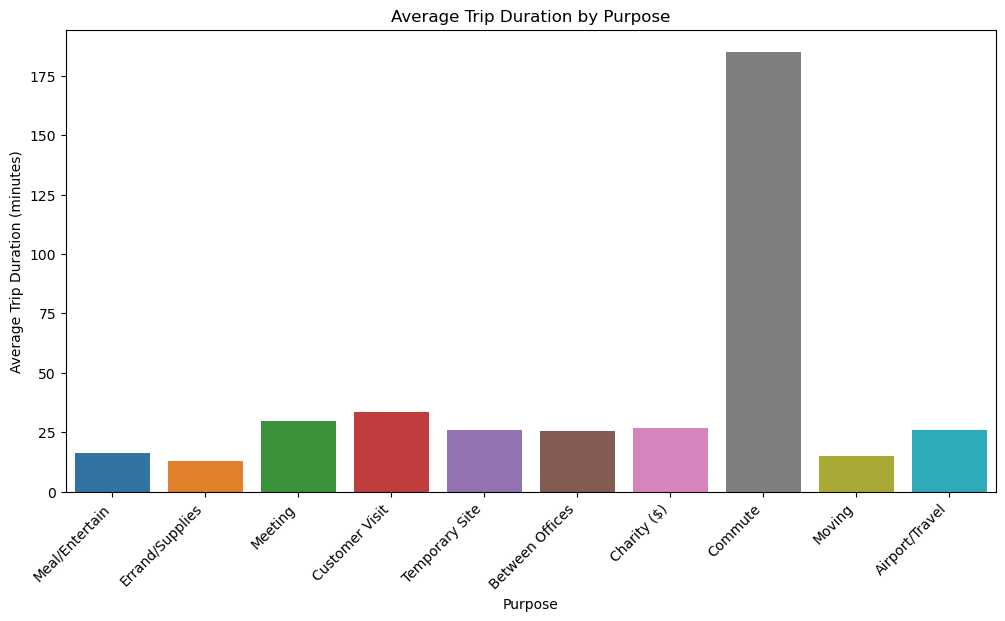

In [30]:
# Convert 'END_DATE' to datetime format
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')

# Calculate trip duration
uber_data['TRIP_DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60  # Duration in minutes

# Visualize average trip duration by purpose
plt.figure(figsize=(12, 6))
sns.barplot(x='PURPOSE', y='TRIP_DURATION', data=uber_data, ci=None)
plt.title('Average Trip Duration by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()


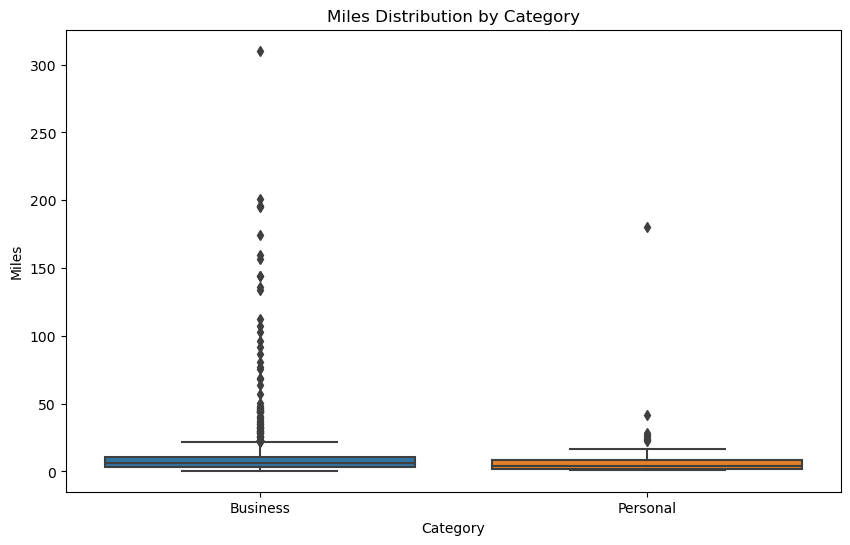

In [31]:
# Visualize miles distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='CATEGORY', y='MILES', data=uber_data)
plt.title('Miles Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Miles')
plt.show()


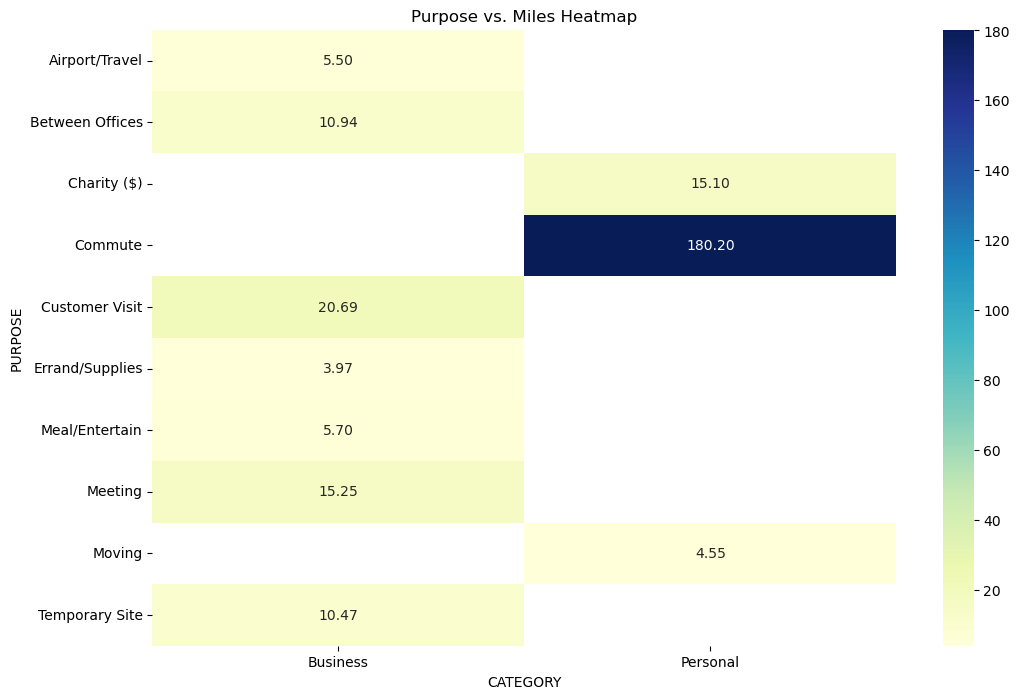

In [32]:
# Create a heatmap of purpose vs. miles
purpose_miles_heatmap = pd.pivot_table(uber_data, values='MILES', index='PURPOSE', columns='CATEGORY', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(purpose_miles_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Purpose vs. Miles Heatmap')
plt.show()


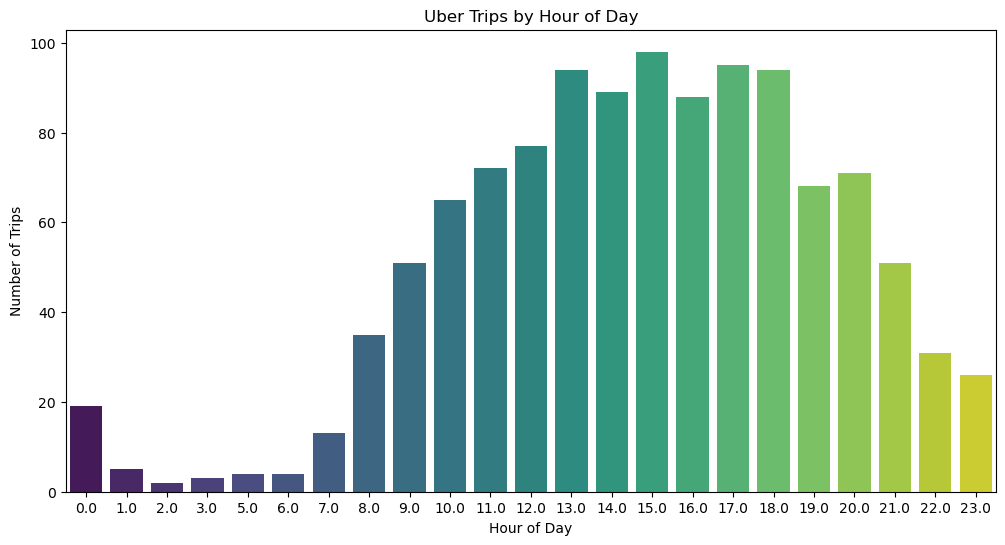

In [33]:
# Extract hour from 'START_DATE'
uber_data['HOUR_OF_DAY'] = uber_data['START_DATE'].dt.hour

# Visualize trips by hour of day
plt.figure(figsize=(12, 6))
sns.countplot(x='HOUR_OF_DAY', data=uber_data, palette='viridis')
plt.title('Uber Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()


$\textbf{CONCLUSION}\$ <BR>
Based on the provided analysis of the Uber data, we can draw the following conclusions:

1. **Basic Statistics:**
   - The dataset contains information on 1,156 Uber trips.
   - The average distance traveled per trip is approximately 21.12 miles.
   - The standard deviation is relatively high (359.30), indicating significant variability in trip distances.
   - The minimum trip distance is 0.5 miles, while the maximum is 12,204.7 miles.

2. **Category Distribution:**
   - The majority of the trips fall under the 'Business' category, with 1,078 occurrences, while 'Personal' trips are less frequent, with 77 occurrences.

3. **Total Miles and Average Miles per Trip:**
   - The total miles covered in the dataset sum up to 24,409.4 miles.
   - On average, each trip covers approximately 21.12 miles.

4. **Purpose of Trips:**
   - The most common purposes for Uber trips are 'Meeting' (187 occurrences), 'Meal/Entertain' (160 occurrences), and 'Errand/Supplies' (128 occurrences).
   - Other purposes include 'Customer Visit,' 'Temporary Site,' 'Between Offices,' 'Moving,' 'Airport/Travel,' 'Charity ($),' and 'Commute.'

In conclusion, the analysis provides insights into the distribution of trip distances, the purpose of trips, and the categorization of trips as business or personal. The dataset appears to have a wide range of trip distances, with a focus on business-related purposes. Further exploration and visualization of the data could reveal additional patterns and insights. Additionally, addressing missing values in the 'PURPOSE' column could enhance the analysis.